In [32]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

.

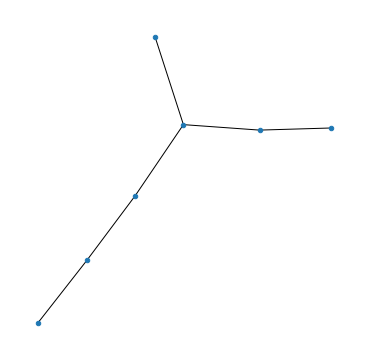

In [36]:
def plot_graphs(graphs, figsize=14, dotsize=20):
    """Utility to plot a lot of graphs from an array of graphs. 
    Each graphs is a list of edges; each edge is a tuple."""
    n = len(graphs)
    fig = plt.figure(figsize=(figsize,figsize))
    fig.patch.set_facecolor('white') # To make copying possible (no transparent background)
    k = int(np.sqrt(n))
    for i in range(n):
        plt.subplot(k+1,k+1,i+1)
        g = nx.Graph()
        for e in graphs[i]:            
            g.add_edge(e[0],e[1])
        nx.draw_kamada_kawai(g, node_size=dotsize)
        print('.', end='')

plot_graphs([[(0, 2), (0, 4), (0, 6), (1, 4), (1, 5), (2, 3)]])

In [21]:
def perm(n, s=None):
    """All permutations of n elements."""
    if s is None: return perm(n, tuple(range(n)))
    if not s: return [[]]
    return [[i]+p for i in s for p in perm(n, tuple([k for k in s if k!=i]))]

perm(3)

[[0, 1, 2], [0, 2, 1], [1, 0, 2], [1, 2, 0], [2, 0, 1], [2, 1, 0]]

In [22]:
def permute(g, n):
    """Create a set of all possible isomorphic codes for a graph, 
    as nice hashable tuples. All edges are i<j, and sorted lexicographically."""
    ps = perm(n)
    out = set([])
    for p in ps:
        out.add(tuple(sorted([(p[i],p[j]) if p[i]<p[j] else (p[j],p[i]) for i,j in g])))
    return list(out)

permute([(0, 1), (0, 2)], 3)

[((0, 1), (0, 2)), ((0, 2), (1, 2)), ((0, 1), (1, 2))]

In [23]:
def connected(g):
    """Check if the graph is fully connected, with Union-Find."""
    nodes = set([i for e in g for i in e])
    roots = {node: node for node in nodes}
    
    def _root(node, depth=0):
        if node==roots[node]: return (node, depth)
        else: return _root(roots[node], depth+1)
    
    for i,j in g:
        ri,di = _root(i)
        rj,dj = _root(j)
        if ri==rj: continue
        if di<=dj: roots[ri] = rj
        else:      roots[rj] = ri
    return len(set([_root(node)[0] for node in nodes]))==1

assert connected([(0, 1), (0, 2), (1, 3)])
assert not connected([(0, 1), (2, 3)])         

In [24]:
mem = set({})
def filter(g, target_nv):
    """Filter all improper graphs: those with not enough nodes, 
    those not fully connected, and those isomorphic to previously considered."""
    global mem
    nv = len(set([i for e in g for i in e]))
    if nv == target_nv and connected(g) and tuple(g) not in mem:
        mem |= set(permute(g, target_nv))
        return True
    return False

In [25]:
def generate_graph(n=2,e=0):
  out = []
  all_edges = []
  for i in range(n):
    for j in range(i,n):
      if not i == j:
        all_edges.append((i,j))

  N = len(all_edges)
  # enumerate the 2**N possible combinations
  for i in range(2**N):
      combo = []
      for j in range(N):
          # test bit jth of integer i
          if (i >> j) % 2 == 1:
              combo.append(all_edges[j])
      # print(combo)
      if e == 0:
        if len(combo) >= n-1:
          if filter(combo,n):

            out.append(combo)
            print(combo)
      else: 
        if len(combo) == e:
          if filter(combo,n):
            print(combo)
            out.append(combo)
        
  return out

generate_graph(4)

[(0, 1), (0, 2), (0, 3)]
[(0, 1), (0, 3), (1, 2)]
[(0, 1), (0, 2), (0, 3), (1, 2)]
[(0, 2), (0, 3), (1, 2), (1, 3)]
[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]
[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


[[(0, 1), (0, 2), (0, 3)],
 [(0, 1), (0, 3), (1, 2)],
 [(0, 1), (0, 2), (0, 3), (1, 2)],
 [(0, 2), (0, 3), (1, 2), (1, 3)],
 [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)],
 [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]]

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)]
[(0, 1), (0, 3), (0, 4), (0, 5), (0, 6), (1, 2)]
[(0, 1), (0, 4), (0, 5), (0, 6), (1, 2), (1, 3)]
[(0, 2), (0, 4), (0, 5), (0, 6), (1, 2), (1, 3)]
[(0, 2), (0, 5), (0, 6), (1, 2), (1, 3), (1, 4)]
[(0, 1), (0, 2), (0, 5), (0, 6), (1, 4), (2, 3)]
[(0, 1), (0, 5), (0, 6), (1, 2), (1, 4), (2, 3)]
[(0, 3), (0, 5), (0, 6), (1, 2), (1, 4), (2, 3)]
[(0, 2), (0, 4), (0, 6), (1, 4), (1, 5), (2, 3)]
[(0, 3), (0, 6), (1, 3), (1, 5), (2, 3), (2, 4)]
[(0, 4), (0, 6), (1, 3), (1, 5), (2, 3), (2, 4)]
Drawing 11 graphs...
...........

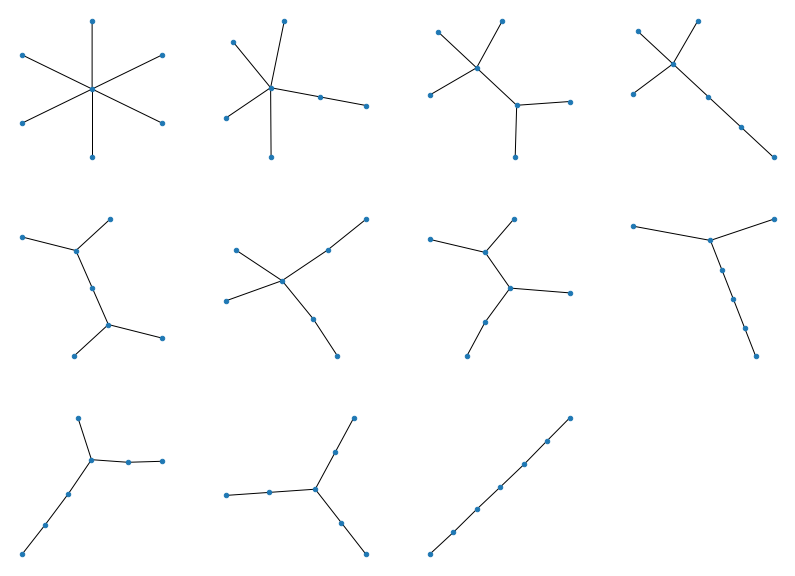

In [37]:
# Finally, we can do the calculation and make the plot!
mem = set({})

gs = generate_graph(7,6)
print(f'Drawing {len(gs)} graphs...')
plot_graphs(gs, figsize=14, dotsize=20)